In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('sandp500_train_d.csv')
training_set = dataset_train.iloc[:, 1:2].values # .values maxe it DataFrame

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# 60 time stamp past values to predict
# choose 60 by experiment 1-time stamp will lead to overfit
X_train = []
y_train = []
for i in range(60, 1258): # first value is only after 60 timestamp 
    X_train.append(training_set_scaled[i-60:i, 0]) # index starts at 0 so 0-59 Time Stamp is the input
    y_train.append(training_set_scaled[i, 0]) # index 60 is the label 
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
# add dimension to numpy list, X_train need to be reshaped
# every ANN cna get a fixed size or input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 
# X_train.shape[0] exactly the number of lines in X_train
# Time Stamp is the second dim in reshape: X_train.shape[1] is the number of cplumn: 60 columns - 60 TS
# the last value is the number of indicators - for instance: another highly correlated stock. in our case - 1 google stock price
# the reshape is need to be done before the data enter the RNN

In [6]:
# importing classes
from keras.models import Sequential # to create neural network
from keras.layers import Dense # to add the output layer
from keras.layers import LSTM # to add the LSTM layers 
from keras.layers import Dropout # dropout layer to prevent overfit

In [7]:
# initialize our RNN as sequence of layers as oppose to computational graph בשונה מגרף חישוב
regressor = Sequential() # an object of the sequential graph which represent a sequence of layers
# we

In [8]:
np.version.version

'1.18.5'

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# return_sequences - true for stack LSTM layers (will add more layers)
# input_shape - input is 3D, 1 corrisponding to time stamp and 1 for predictors - indicators
# units - number of LSTM units / neurons
# many units increase dimensionality, stock's are complicated - need high dimensunality
# Dropout rate - percentage of neurons to drop - avoid overfit - normaly 20% - 10 neurons will dropoup each irreation 
# need Numpy version: 1.18.5















In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(Dense(units = 1))

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0506
Epoch 2/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0087
Epoch 3/100
38/38 [==============================] - 2s 50ms/step - loss: 0.0073
Epoch 4/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0079
Epoch 5/100
38/38 [==============================] - 2s 50ms/step - loss: 0.0060
Epoch 6/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0060
Epoch 7/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0061
Epoch 8/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0057
Epoch 9/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0057
Epoch 10/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0054
Epoch 11/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0055
Epoch 12/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0058
Epoch 13/100
38/38 [=====

38/38 [==============================] - 3s 66ms/step - loss: 0.0018


In [22]:
dataset_test = pd.read_csv('sandp500_test_d.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [23]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

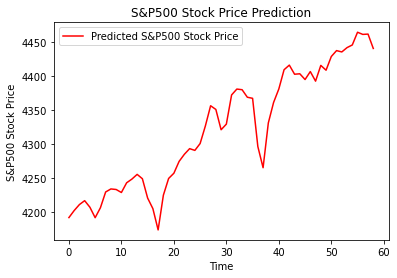

In [26]:
plt.plot(real_stock_price, color = 'red', label = 'Predicted S&P500 Stock Price')
plt.title('S&P500 Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('S&P500 Stock Price')
plt.legend()
plt.show()